In [2]:
import pandas as pd

# Load the dataset (update path if it's in another folder)
df = pd.read_csv(r"D:\utkarsh\project\Datascience\anaconda_projects\who_suicide_statistics.csv")

# Preview the top 5 rows
df.head()


,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [3]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Column names and data types
df.info()


Dataset shape: (43776, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [4]:
df.describe()


,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
print("Unique countries:", df['country'].nunique())
print("Years range:", df['year'].min(), "to", df['year'].max())
print("Age groups:", df['age'].unique())
print("Sex values:", df['sex'].unique())


Unique countries: 141
Years range: 1979 to 2016
Age groups: ['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']
Sex values: ['female' 'male']


In [7]:
df_cleaned = df.dropna(subset=["suicides_no", "population"]).copy()
print("New shape after dropping nulls:", df_cleaned.shape)


New shape after dropping nulls: (36060, 6)


In [8]:
df_cleaned["suicides_no"] = df_cleaned["suicides_no"].astype(int)
df_cleaned["population"] = df_cleaned["population"].astype(int)


In [9]:
df_cleaned["suicide_rate_per_100k"] = (df_cleaned["suicides_no"] / df_cleaned["population"]) * 100000
df_cleaned["suicide_rate_per_100k"] = df_cleaned["suicide_rate_per_100k"].round(2)


In [10]:
df_cleaned.head()


,country,year,sex,age,suicides_no,population,suicide_rate_per_100k
24,Albania,1987,female,15-24 years,14,289700,4.83
25,Albania,1987,female,25-34 years,4,257200,1.56
26,Albania,1987,female,35-54 years,6,278800,2.15
27,Albania,1987,female,5-14 years,0,311000,0.00
28,Albania,1987,female,55-74 years,0,144600,0.00


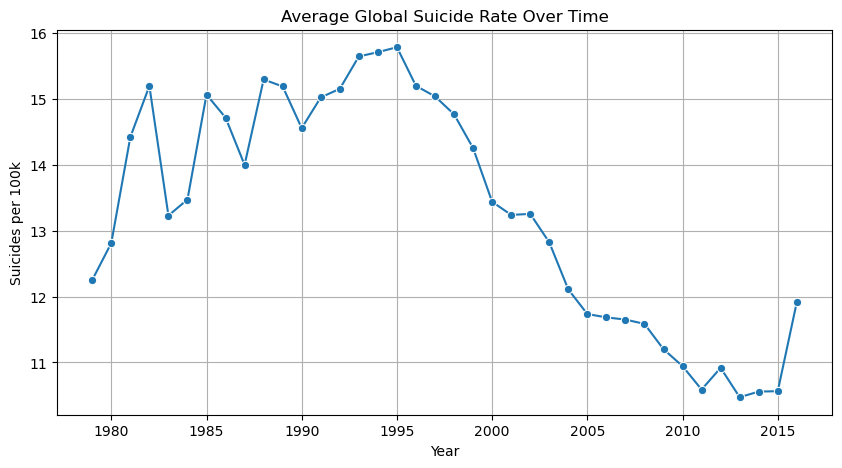

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate by year
yearly_trend = df_cleaned.groupby("year")["suicide_rate_per_100k"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x="year", y="suicide_rate_per_100k", marker="o")
plt.title("Average Global Suicide Rate Over Time")
plt.ylabel("Suicides per 100k")
plt.xlabel("Year")
plt.grid(True)
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_12008\1271148800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_rate, x="sex", y="suicide_rate_per_100k", palette="Set2")


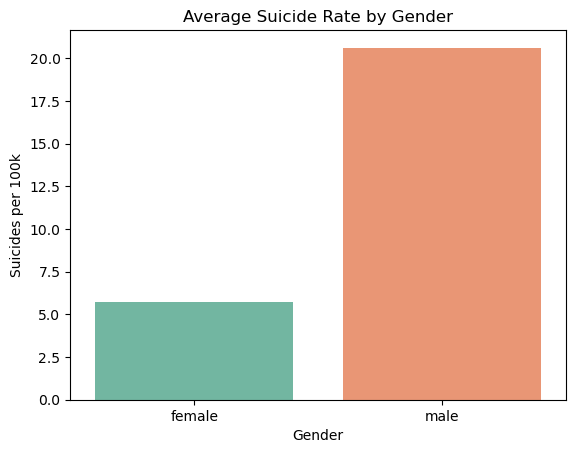

In [14]:
# Group by sex
gender_rate = df_cleaned.groupby("sex")["suicide_rate_per_100k"].mean().reset_index()

# Plot
sns.barplot(data=gender_rate, x="sex", y="suicide_rate_per_100k", palette="Set2")
plt.title("Average Suicide Rate by Gender")
plt.ylabel("Suicides per 100k")
plt.xlabel("Gender")
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_12008\3087965301.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_rate, x="age", y="suicide_rate_per_100k", palette="coolwarm")


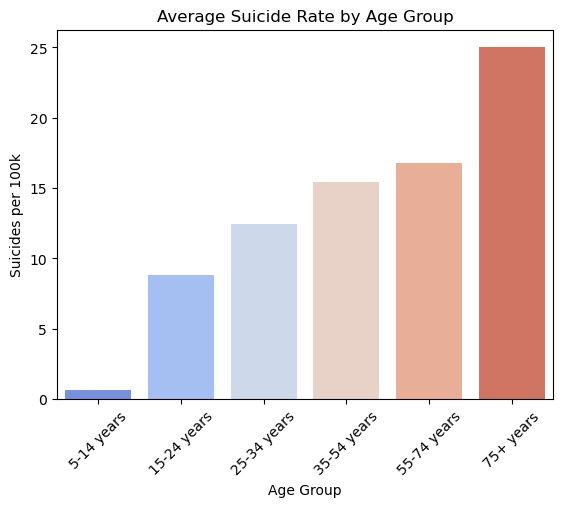

In [15]:
# Sort age groups in proper order
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
age_rate = df_cleaned.groupby("age")["suicide_rate_per_100k"].mean().reindex(age_order).reset_index()

# Plot
sns.barplot(data=age_rate, x="age", y="suicide_rate_per_100k", palette="coolwarm")
plt.title("Average Suicide Rate by Age Group")
plt.ylabel("Suicides per 100k")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()


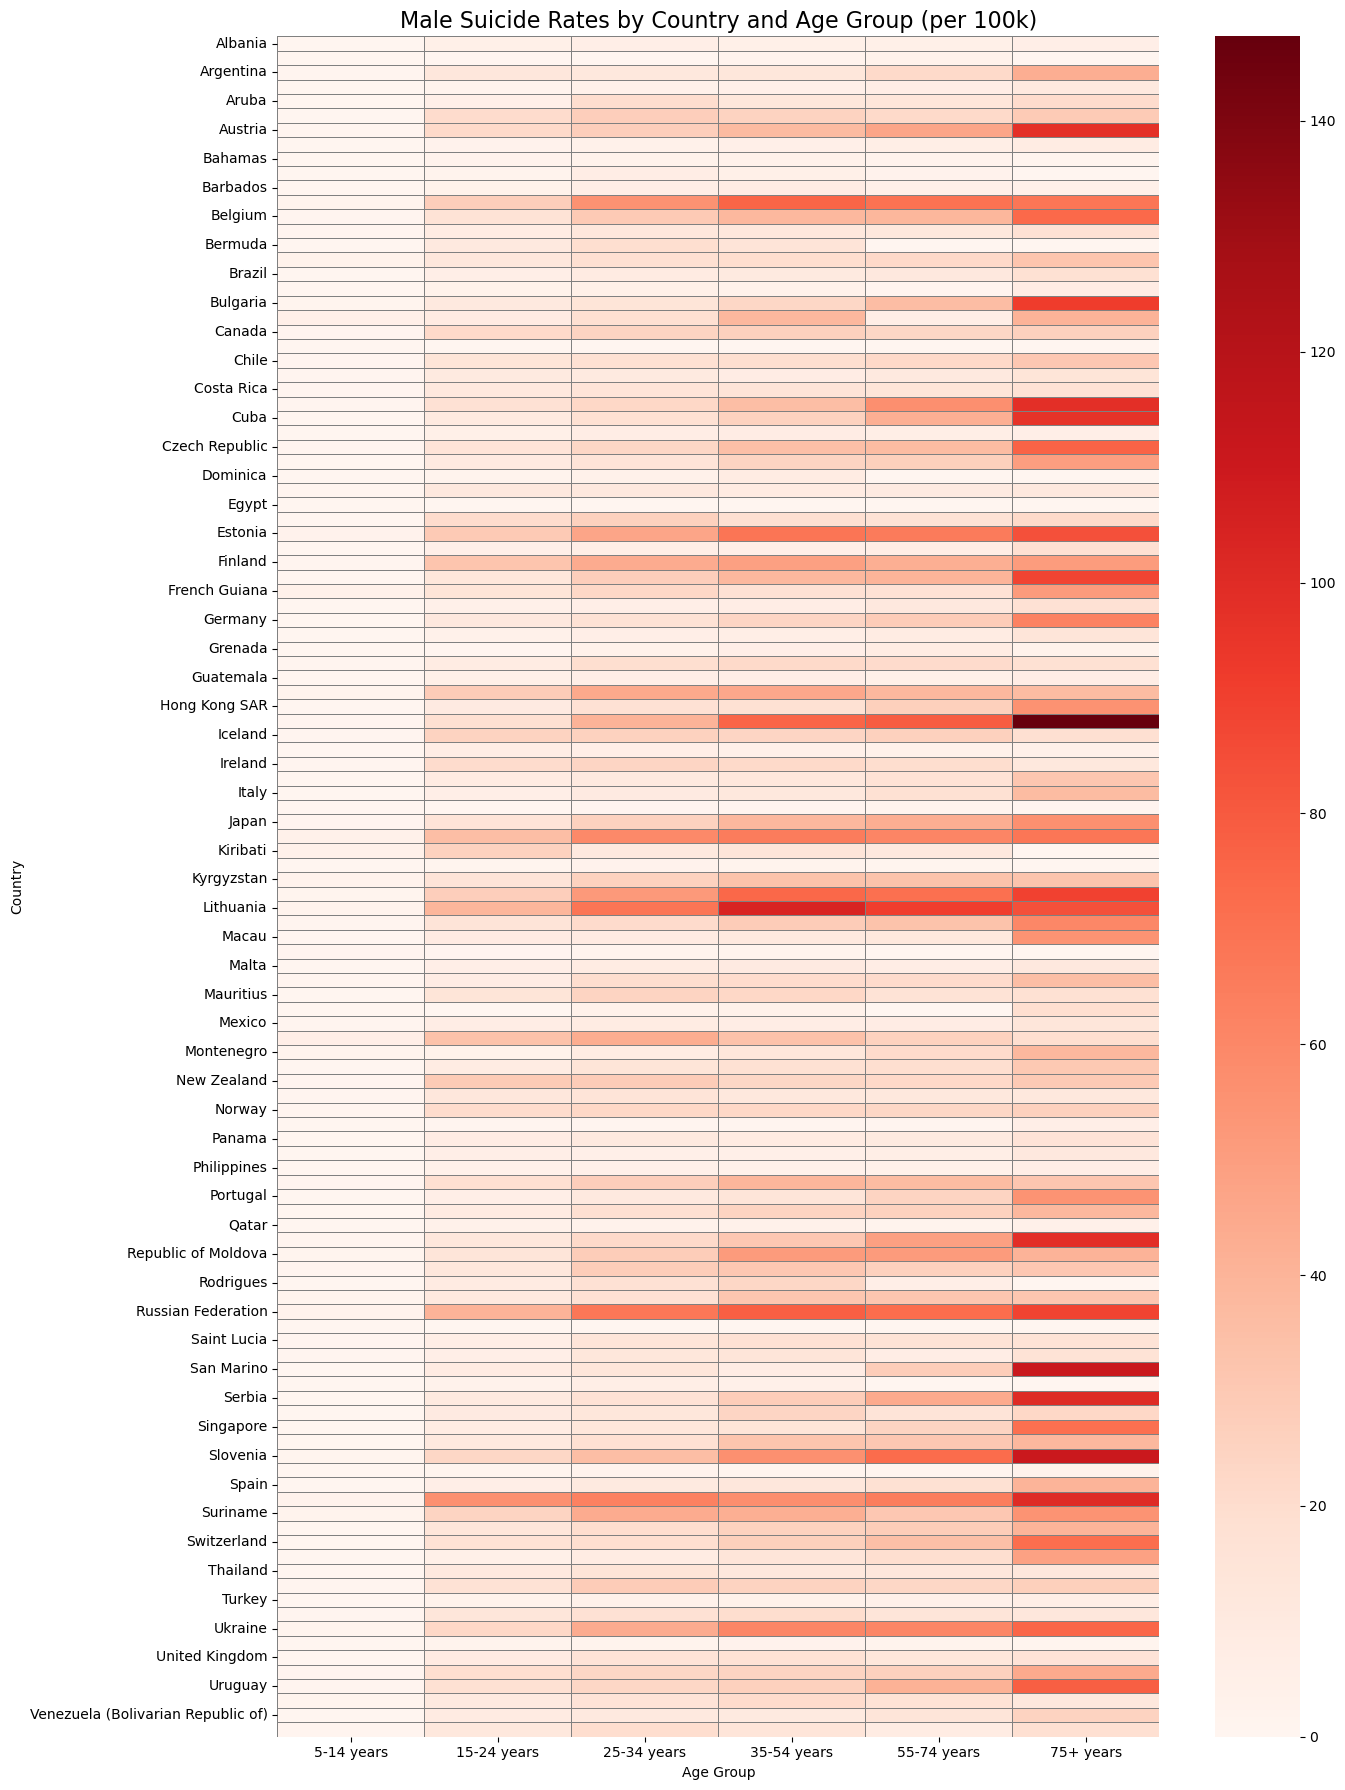

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group and aggregate
grouped = df_cleaned.groupby(['country', 'sex', 'age'])['suicide_rate_per_100k'].mean().reset_index()

# Step 2: Create a pivot table (you can pick 'male' or 'female' or both)
pivot_data = grouped[grouped['sex'] == 'male'].pivot(index='country', columns='age', values='suicide_rate_per_100k')

# Step 3: Reorder age columns for clarity
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
pivot_data = pivot_data[age_order]

# Step 4: Plot the heatmap
plt.figure(figsize=(14, 18))
sns.heatmap(pivot_data, cmap="Reds", annot=False, linewidths=0.5, linecolor='gray')
plt.title('Male Suicide Rates by Country and Age Group (per 100k)', fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


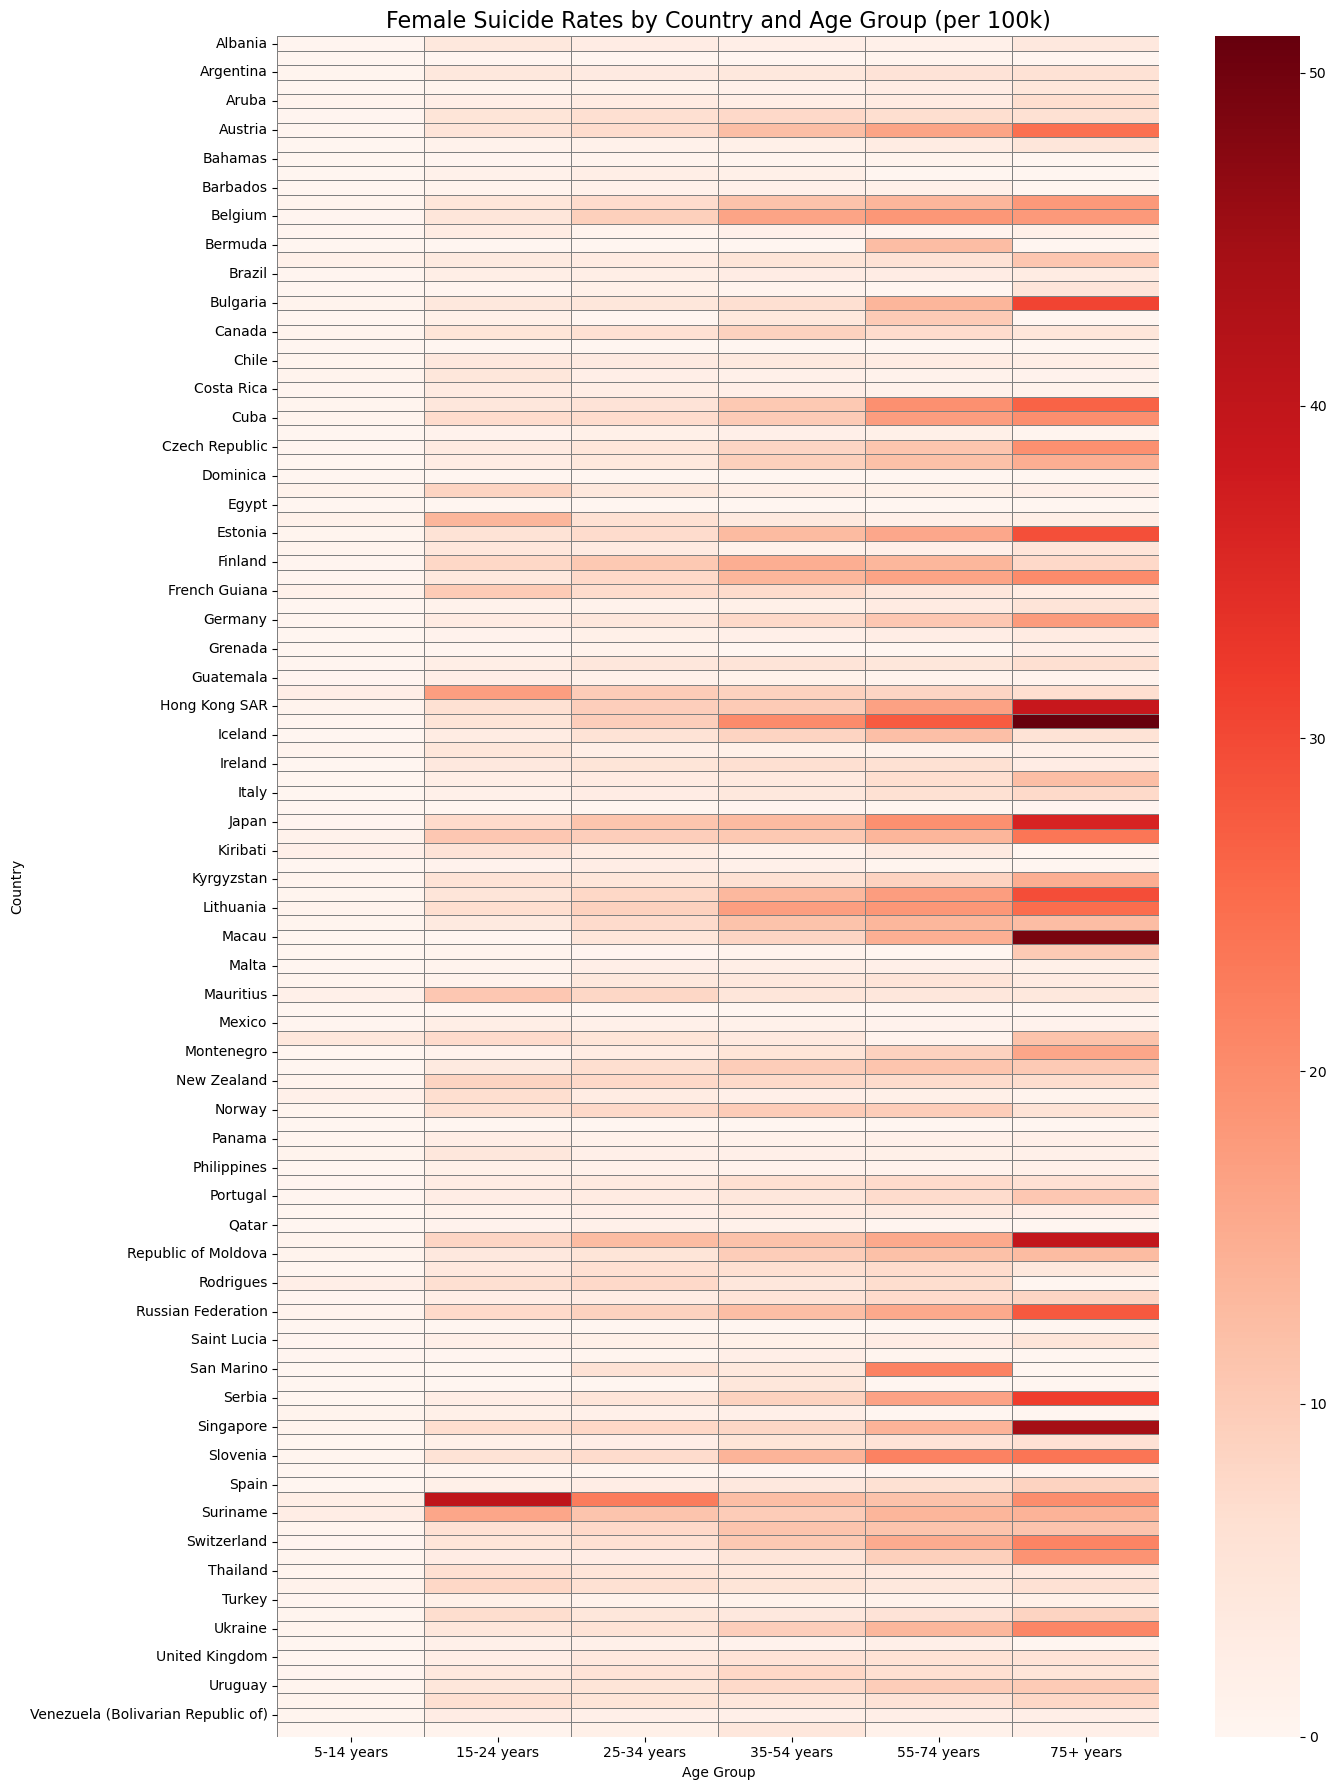

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group and aggregate
grouped = df_cleaned.groupby(['country', 'sex', 'age'])['suicide_rate_per_100k'].mean().reset_index()

# Step 2: Create a pivot table (you can pick 'male' or 'female' or both)
pivot_data = grouped[grouped['sex'] == 'female'].pivot(index='country', columns='age', values='suicide_rate_per_100k')

# Step 3: Reorder age columns for clarity
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
pivot_data = pivot_data[age_order]

# Step 4: Plot the heatmap
plt.figure(figsize=(14, 18))
sns.heatmap(pivot_data, cmap="Reds", annot=False, linewidths=0.5, linecolor='gray')
plt.title('Female Suicide Rates by Country and Age Group (per 100k)', fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [22]:
# Save cleaned data to the current working directory
df_cleaned.to_csv("suicide_cleaned_data.csv", index=False)

print("✅ Cleaned data saved as 'suicide_cleaned_data.csv' in the current directory.")


✅ Cleaned data saved as 'suicide_cleaned_data.csv' in the current directory.
